# Exploratory data analysis

## Setup

In [14]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)

Windows-10-10.0.19045-SP0
Python 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]


In [15]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
train = pd.read_csv('../data/final/train.csv')
test = pd.read_csv('../data/final/test.csv')

train.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupCount,CabinDeck,CabinSide
734,Earth,True,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,False,1,G,P
5294,Europa,False,55 Cancri e,50.0,False,0.0,103.0,0.0,240.0,8221.0,False,2,C,P
471,missing,True,55 Cancri e,53.0,False,0.0,0.0,0.0,0.0,0.0,True,6,B,S
7647,Earth,False,missing,26.0,False,0.0,0.0,0.0,622.0,8.0,False,1,F,P
2913,Mars,False,TRAPPIST-1e,21.0,False,1507.0,NaN,3.0,2.0,1196.0,False,1,D,P


In [17]:
train.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
GroupCount        0
CabinDeck         0
CabinSide         0
dtype: int64

In [18]:
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col not in [TARGET]]

numerical = train[FEATURES].select_dtypes(include=np.number).columns
categorical = train[FEATURES].select_dtypes(exclude=np.number).columns

print(f'Target: {TARGET}')
print(f'Features:\n\tnumerical: {numerical.to_list()}\n\tcategorical:{categorical.to_list()}')
print(f'Shapes:\n\ttrain: {train.shape}\n\ttest: {test.shape}')

Target: Transported
Features:
	numerical: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupCount']
	categorical:['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']
Shapes:
	train: (8693, 14)
	test: (4277, 13)


In [19]:
os.makedirs('../figures', exist_ok=True)
sns.set_style("darkgrid")
sns.set_palette('muted')

## Response marginal analysis

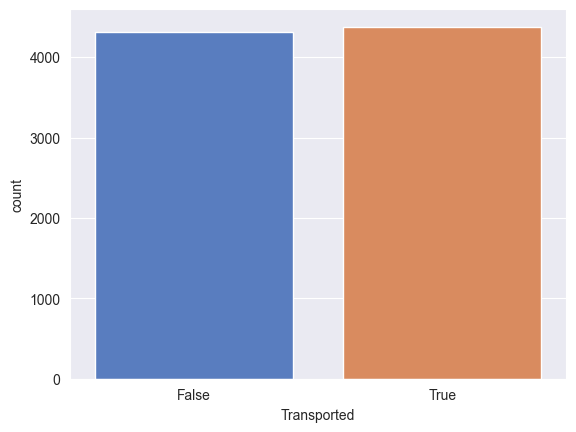

In [20]:
sns.countplot(x=TARGET, data=train)
plt.savefig('../figures/response_marginal.png')

## Features marginal analysis

### Categorical features

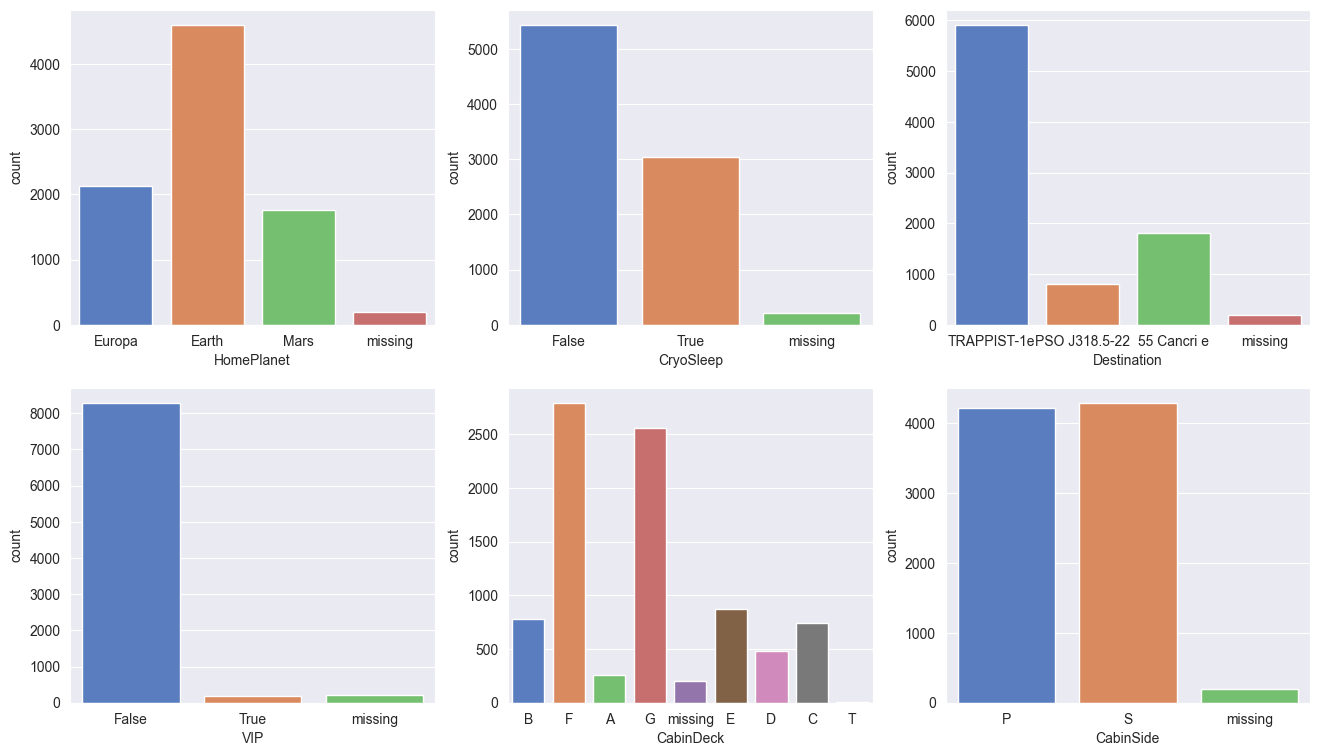

In [21]:
# countplot of categorical features
fig, axs = plt.subplots(2, 3, figsize = (16, 9))
for ax, c in zip(axs.flatten(), categorical):
    sns.countplot(x=c, data=train, ax=ax)
plt.savefig('../figures/categorical_marginal.png')

### Numerical features

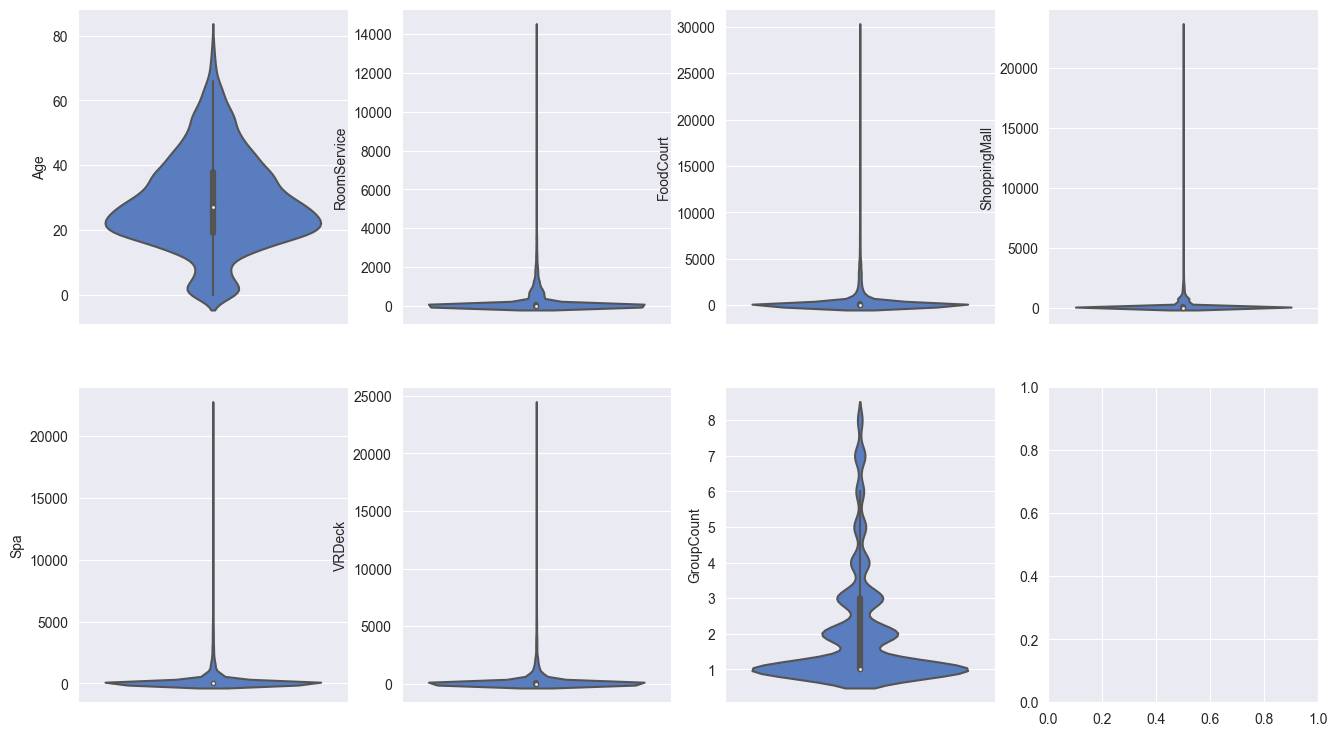

In [22]:
# violinplot of numerical features
fig, axs = plt.subplots(2, 4, figsize = (16, 9))
for ax, c in zip(axs.flatten(), numerical):
    sns.violinplot(y=c, data=train, ax=ax)
plt.savefig('../figures/numerical_marginal.png')

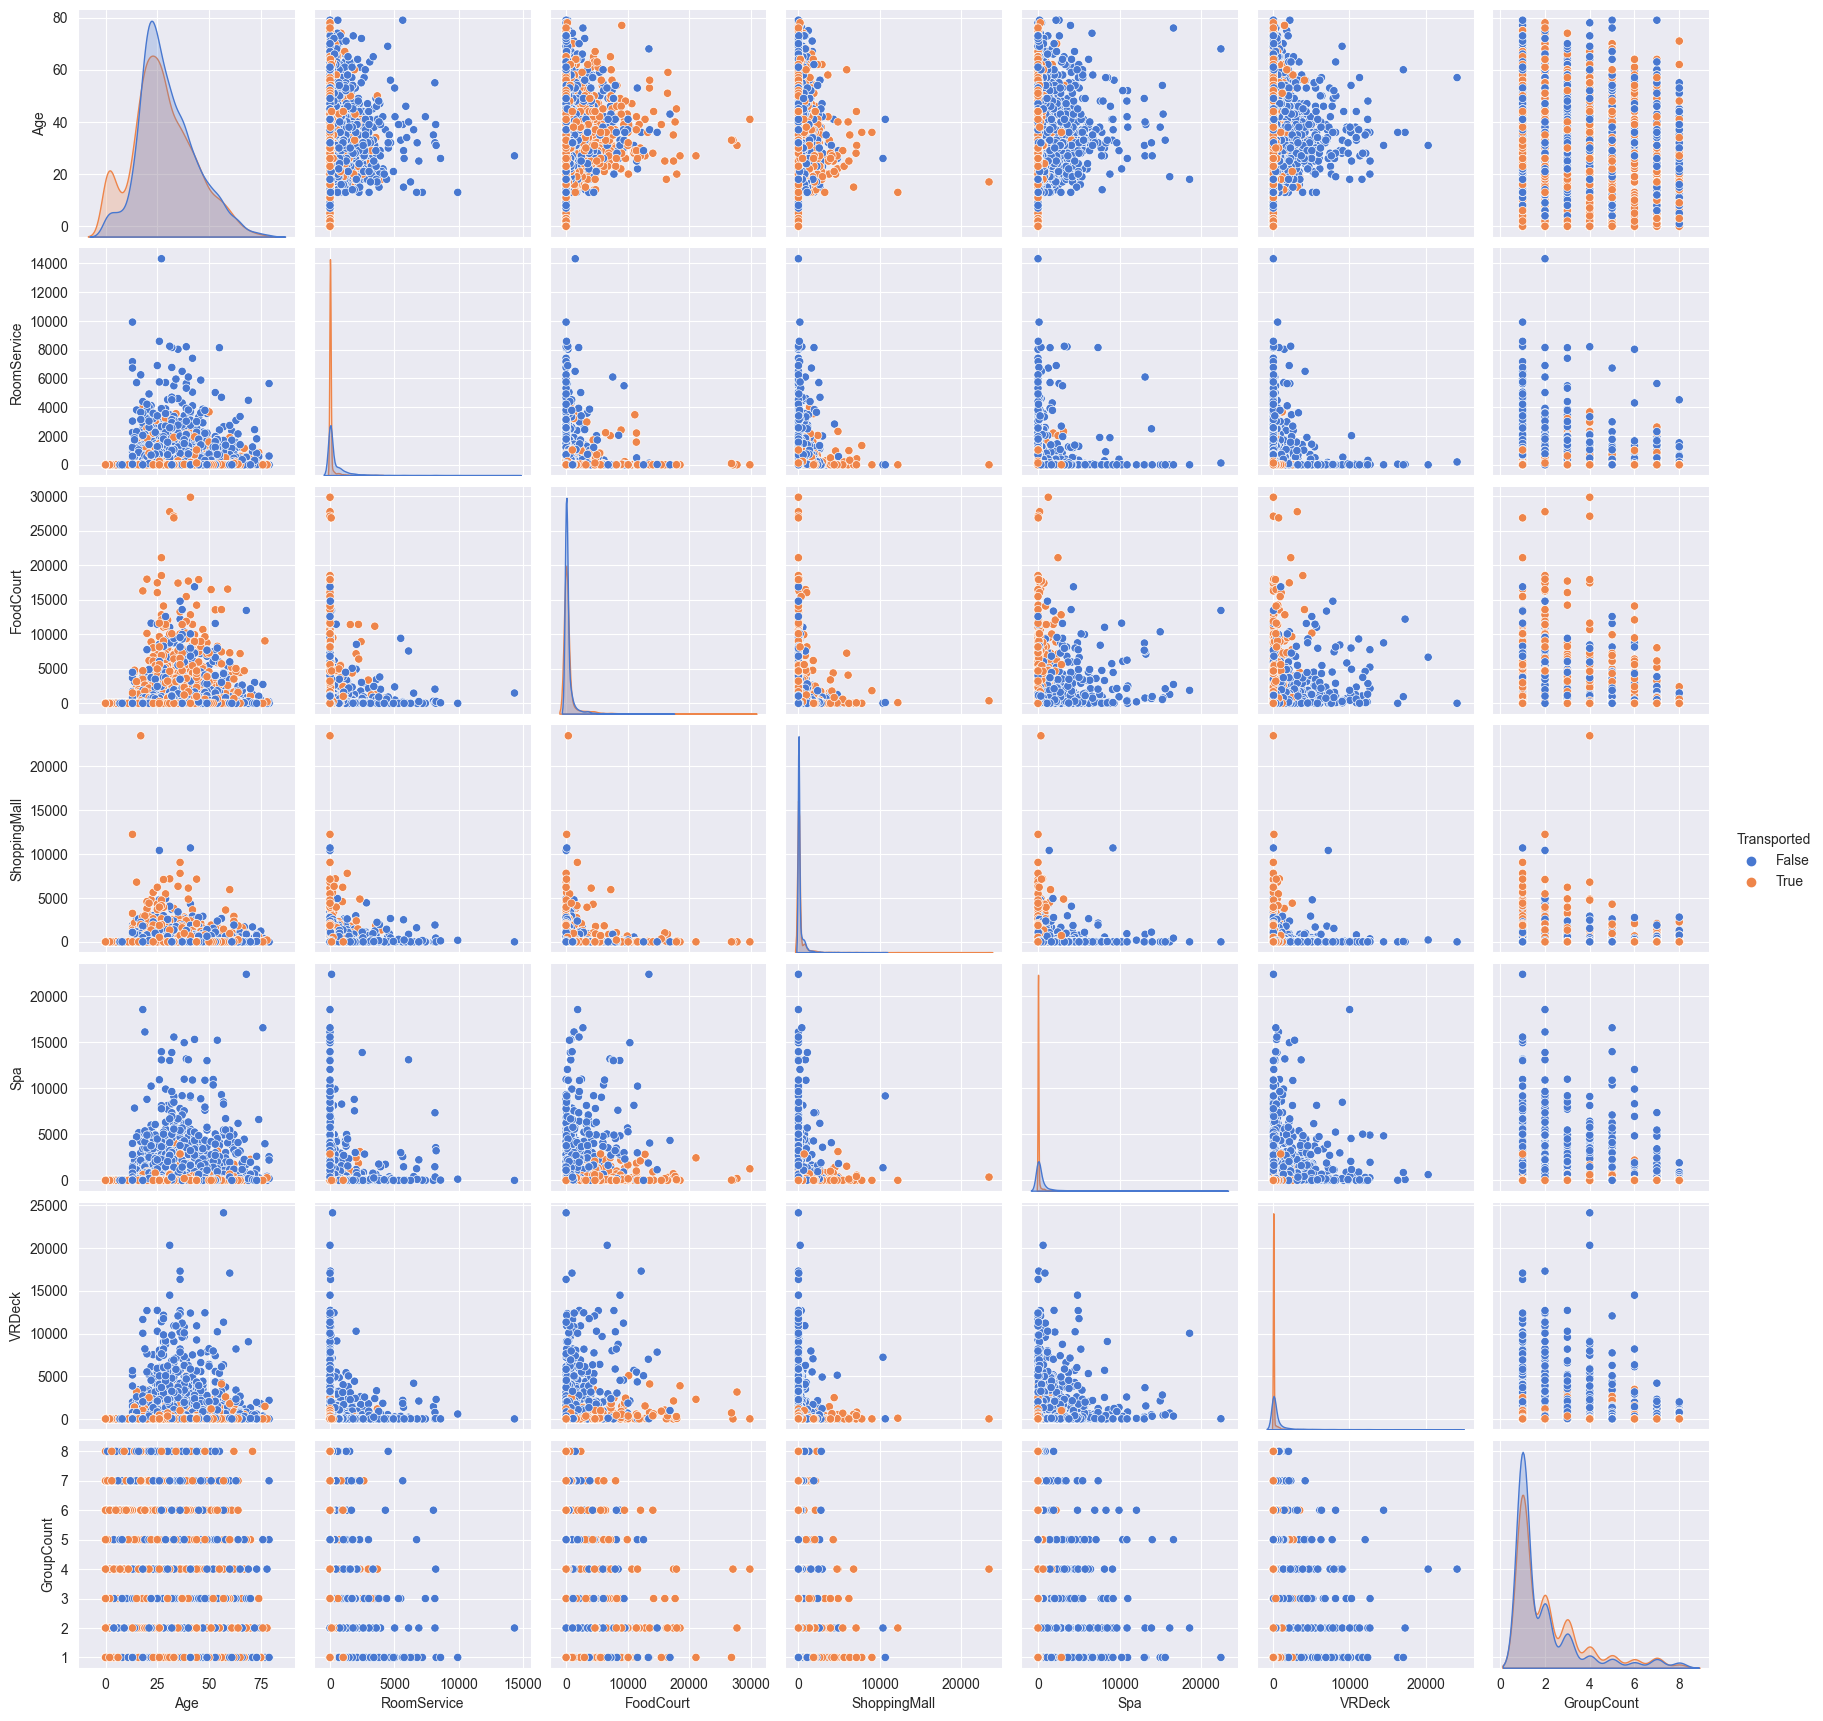

In [23]:
# numerical features
toplot = pd.concat([train[FEATURES], train[TARGET]], axis=1)
sns.pairplot(toplot, vars = numerical, hue= TARGET, height=2.5)
plt.savefig('../figures/numerical_pairplot.png')

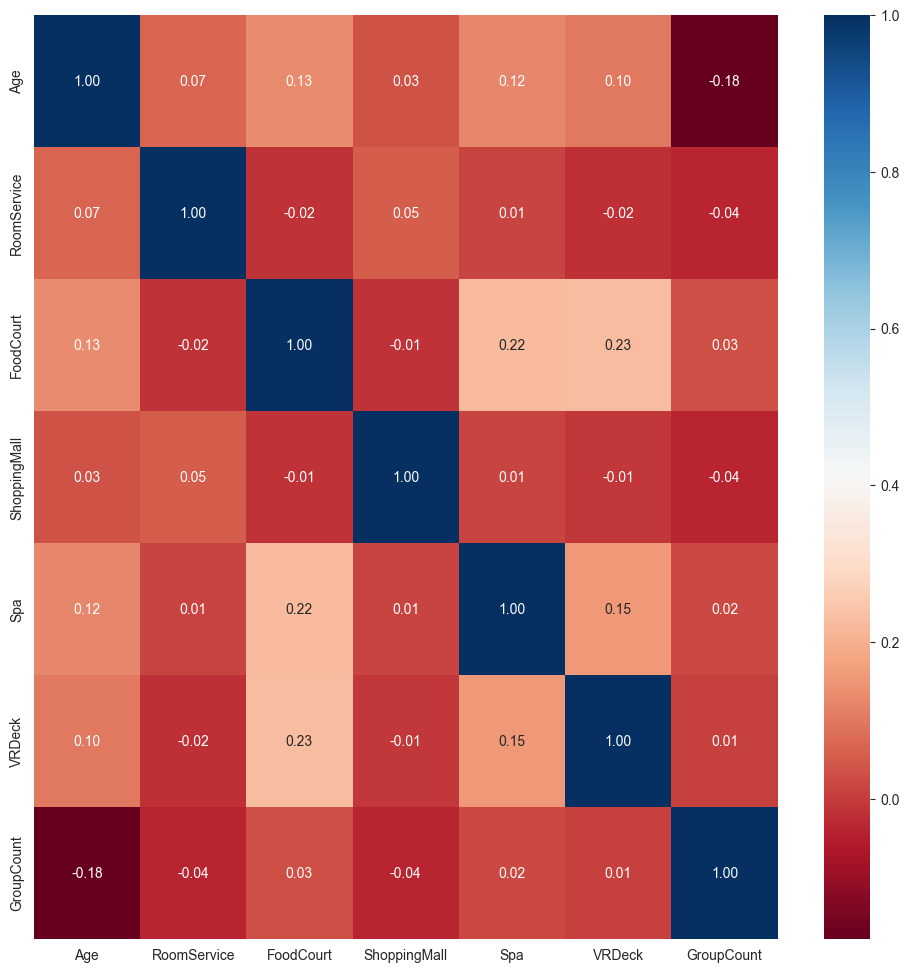

In [24]:
# correlation between numerical variables
fig, ax = plt.subplots(figsize=(12, 12))     
sns.heatmap(train[numerical].corr(), annot=True, fmt = ".2f", cmap = "RdBu")
plt.savefig('../figures/numerical_corrmap.png')

## Bivariate analysis

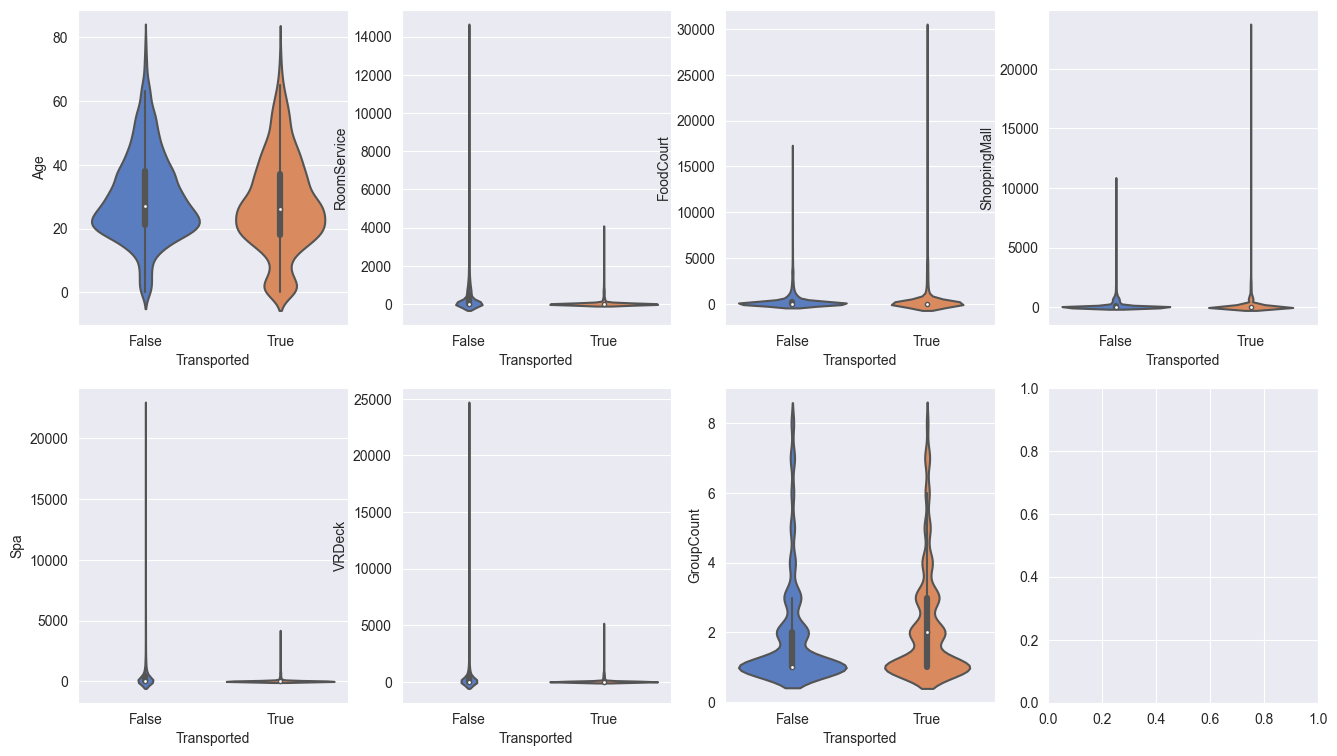

In [25]:
# boxplot of numerical features by response value
fig, axs = plt.subplots(2, 4, figsize = (16, 9))
for ax, c in zip(axs.flatten(), numerical):
    sns.violinplot(y=c, x=TARGET, data=train, ax=ax)
plt.savefig('../figures/categorical_bivariate.png')

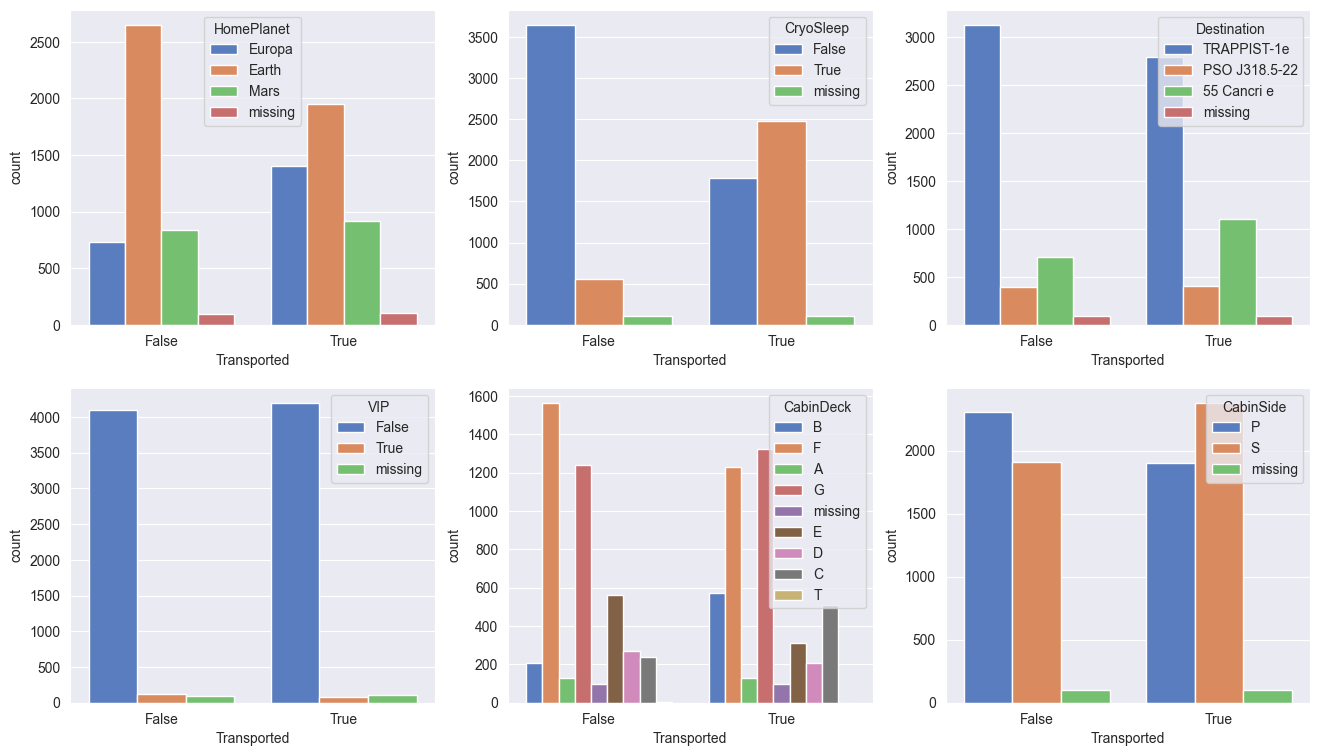

In [26]:
# countplot of categorical features by response value
fig, axs = plt.subplots(2, 3, figsize = (16, 9))
for ax, c in zip(axs.flatten(), categorical):
    sns.countplot(x=TARGET, hue=c, data=train, ax=ax)
plt.savefig('../figures/numerical_bivariate.png')